## importing Libraries

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Loading Dataset

In [207]:
file_path = "/Users/mayurimamdi/Downloads/archive-2/Chocolate Sales.csv"

In [208]:
df=pd.read_csv(file_path)

## Analyze the dataset

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [210]:
df.shape

(3282, 6)

In [211]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [212]:
df['Country'].value_counts()

Country
Australia      615
India          552
USA            537
UK             534
Canada         525
New Zealand    519
Name: count, dtype: int64

In [213]:
df['Product'].value_counts()

Product
50% Dark Bites          180
Eclairs                 180
Smooth Sliky Salty      177
White Choc              174
Drinking Coco           168
Spicy Special Slims     162
Organic Choco Syrup     156
After Nines             150
85% Dark Bars           150
Fruit & Nut Bars        150
Milk Bars               147
Peanut Butter Cubes     147
99% Dark & Pure         147
Almond Choco            144
Raspberry Choco         144
Orange Choco            141
Mint Chip Choco         135
Manuka Honey Choco      135
Caramel Stuffed Bars    129
70% Dark Bites          126
Baker's Choco Chips     123
Choco Coated Almonds    117
Name: count, dtype: int64

## Data cleaning

In [214]:
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [215]:
df.duplicated().sum()

np.int64(0)

In [216]:
df['Sales Person'].unique()

array(['Jehu Rudeforth', 'Van Tuxwell', 'Gigi Bohling', 'Jan Morforth',
       'Oby Sorrel', 'Gunar Cockshoot', 'Brien Boise',
       'Rafaelita Blaksland', 'Barr Faughny', 'Mallorie Waber',
       'Karlen McCaffrey', "Marney O'Breen", 'Beverie Moffet',
       'Roddy Speechley', 'Curtice Advani', 'Husein Augar', 'Kaine Padly',
       'Dennison Crosswaite', "Wilone O'Kielt", 'Andria Kimpton',
       'Kelci Walkden', 'Camilla Castle', 'Madelene Upcott',
       'Dotty Strutley', 'Ches Bonnell'], dtype=object)

## EDA

In [217]:
df_grp=df.groupby('Product')['Boxes Shipped'].sum().reset_index()


/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_73801/1488314865.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_grp, x='Product', y='Boxes Shipped', ci=None, palette='Set2')
/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_73801/1488314865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grp, x='Product', y='Boxes Shipped', ci=None, palette='Set2')


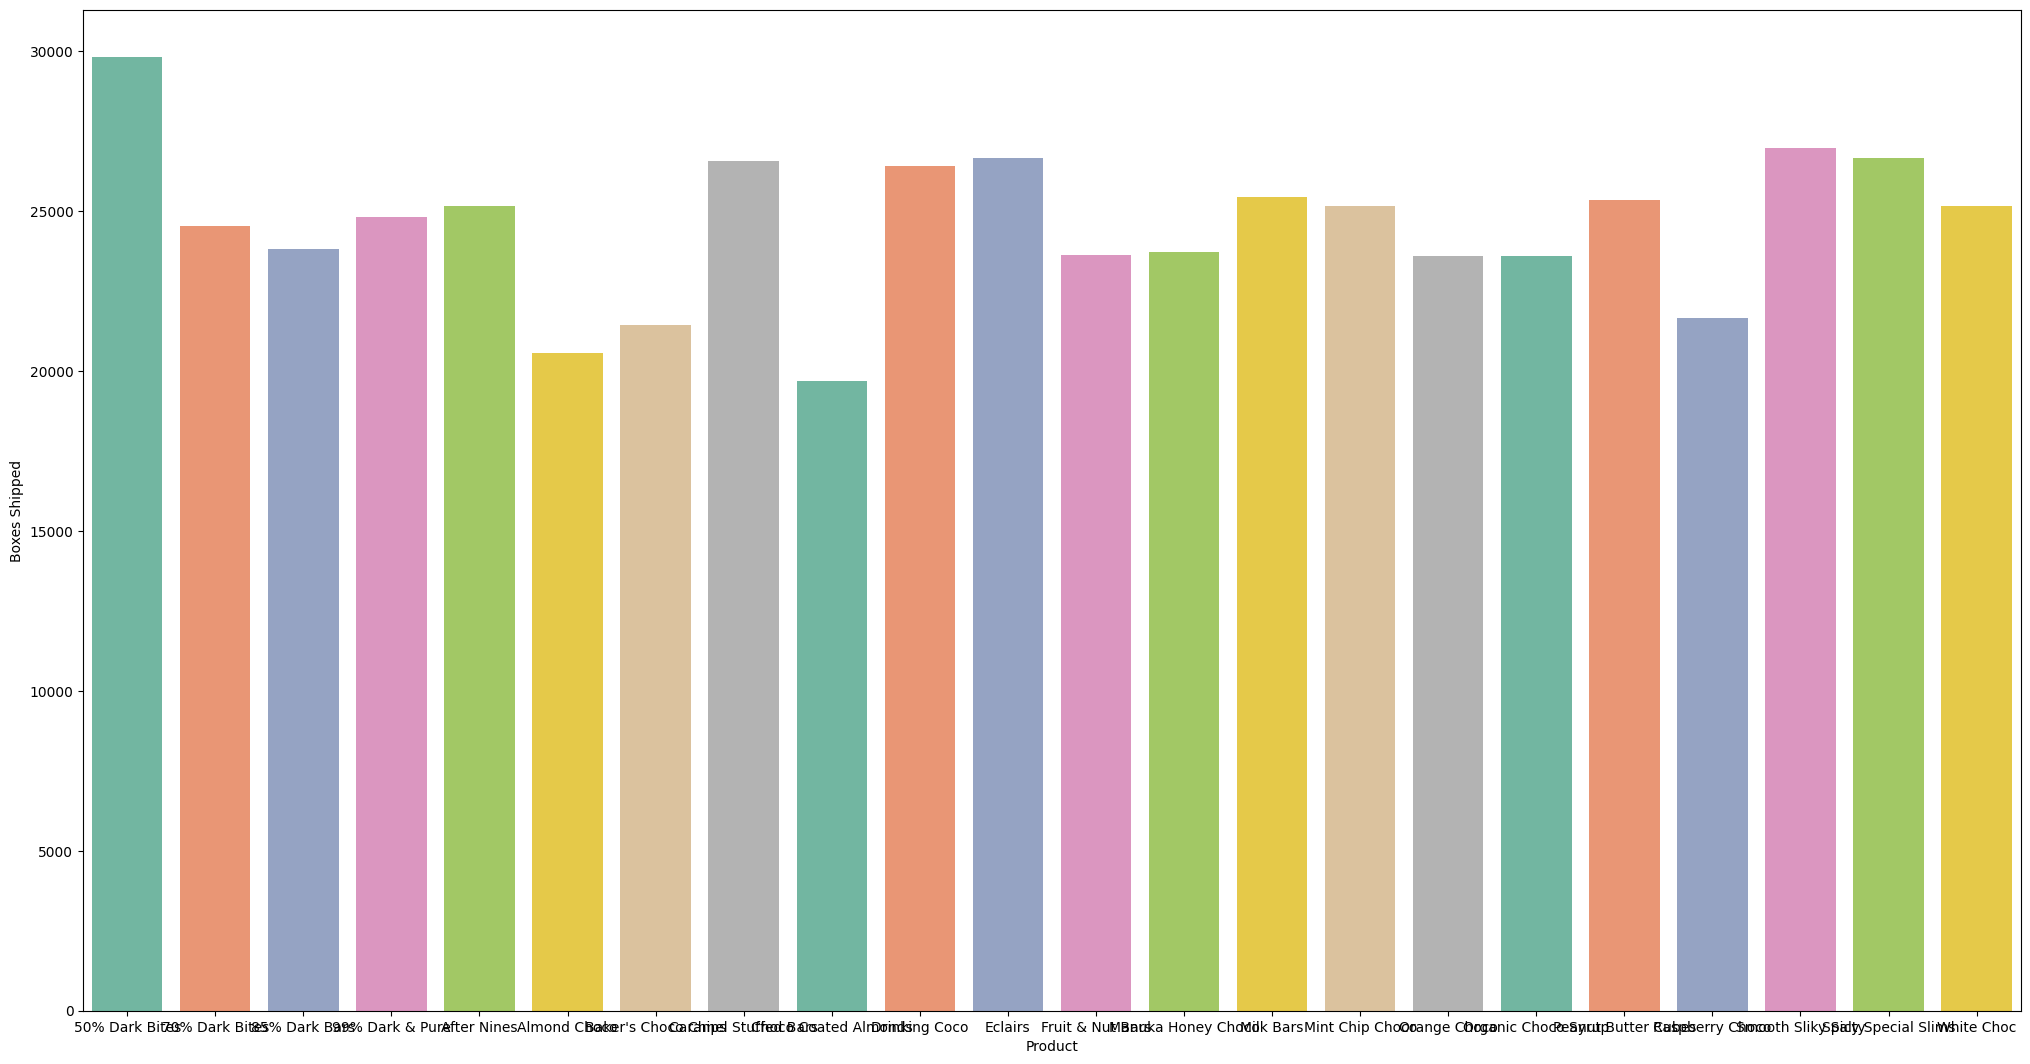

In [218]:
plt.figure(figsize=(25,13))
sns.barplot(data=df_grp, x='Product', y='Boxes Shipped', ci=None, palette='Set2')
plt.show()

## Feature Engineering

In [219]:
df['day']=df['Date'].str.split('/').str[0].astype(int)

In [220]:
df['month']=df['Date'].str.split('/').str[1].astype(int)

In [221]:
df['year']=df['Date'].str.split('/').str[2].astype(int)

In [222]:
df.drop(columns='Date', axis=1, inplace=True)

In [223]:
df.head()

,Sales Person,Country,Product,Amount,Boxes Shipped,day,month,year
0,Jehu Rudeforth,UK,Mint Chip Choco,"$5,320.00",180,4,1,2022
1,Van Tuxwell,India,85% Dark Bars,"$7,896.00",94,1,8,2022
2,Gigi Bohling,India,Peanut Butter Cubes,"$4,501.00",91,7,7,2022
3,Jan Morforth,Australia,Peanut Butter Cubes,"$12,726.00",342,27,4,2022
4,Jehu Rudeforth,UK,Peanut Butter Cubes,"$13,685.00",184,24,2,2022


In [224]:
df['Amount'] = (
    df['Amount']
    .str.replace(r'[$,]', '', regex=True)
    .astype(float)
    .astype(int)
)


In [225]:
df.head()

,Sales Person,Country,Product,Amount,Boxes Shipped,day,month,year
0,Jehu Rudeforth,UK,Mint Chip Choco,5320,180,4,1,2022
1,Van Tuxwell,India,85% Dark Bars,7896,94,1,8,2022
2,Gigi Bohling,India,Peanut Butter Cubes,4501,91,7,7,2022
3,Jan Morforth,Australia,Peanut Butter Cubes,12726,342,27,4,2022
4,Jehu Rudeforth,UK,Peanut Butter Cubes,13685,184,24,2,2022


In [226]:
X=df[['Boxes Shipped','Product']]
y=df['Amount']

In [227]:
X = pd.get_dummies(X, columns=['Product'], drop_first=True)

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [230]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor( n_estimators=100, random_state=42, n_jobs=-1)



In [231]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [232]:
y_pred=rf_model.predict(X_test)

In [235]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)


print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

MAE  : 3108.04
RMSE : 4246.99
R²   : -0.072


#### maybe the feature selection went wrong since the output is very bad 

In [236]:
df['Country'].unique()

array(['UK', 'India', 'Australia', 'New Zealand', 'USA', 'Canada'],
      dtype=object)

In [237]:
country_count=pd.get_dummies(df['Country'])

In [241]:
dff=pd.concat([df,country_count],axis=1)

In [244]:
dff['UK']=dff['UK'].astype(int)

In [245]:
dff['USA']=dff['USA'].astype(int)

In [246]:
dff['New Zealand']=dff['New Zealand'].astype(int)

In [247]:
dff['Australia']=dff['Australia'].astype(int)

In [248]:
dff['Canada']=dff['Canada'].astype(int)

In [249]:
dff['India']=dff['India'].astype(int)

In [250]:
dff.head()

,Sales Person,Country,Product,Amount,Boxes Shipped,day,month,year,Australia,Canada,India,New Zealand,UK,USA
0,Jehu Rudeforth,UK,Mint Chip Choco,5320,180,4,1,2022,0,0,0,0,1,0
1,Van Tuxwell,India,85% Dark Bars,7896,94,1,8,2022,0,0,1,0,0,0
2,Gigi Bohling,India,Peanut Butter Cubes,4501,91,7,7,2022,0,0,1,0,0,0
3,Jan Morforth,Australia,Peanut Butter Cubes,12726,342,27,4,2022,1,0,0,0,0,0
4,Jehu Rudeforth,UK,Peanut Butter Cubes,13685,184,24,2,2022,0,0,0,0,1,0


In [251]:
dff.drop(columns='Country', axis=1, inplace=True)

In [252]:
dff.head()

,Sales Person,Product,Amount,Boxes Shipped,day,month,year,Australia,Canada,India,New Zealand,UK,USA
0,Jehu Rudeforth,Mint Chip Choco,5320,180,4,1,2022,0,0,0,0,1,0
1,Van Tuxwell,85% Dark Bars,7896,94,1,8,2022,0,0,1,0,0,0
2,Gigi Bohling,Peanut Butter Cubes,4501,91,7,7,2022,0,0,1,0,0,0
3,Jan Morforth,Peanut Butter Cubes,12726,342,27,4,2022,1,0,0,0,0,0
4,Jehu Rudeforth,Peanut Butter Cubes,13685,184,24,2,2022,0,0,0,0,1,0


In [259]:
X=dff[['Product','Boxes Shipped','month','day','year','UK','USA','New Zealand','Canada','India','Australia']]
y=df['Amount']
X = pd.get_dummies(X, drop_first=True)

In [260]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [278]:
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor(
    n_estimators=300,
    max_depth=18,          # not too shallow
    min_samples_split=5,   # moderate
    min_samples_leaf=2,    # light regularization
    random_state=42,
    n_jobs=-1
)


In [279]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=18, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [280]:
y_pred=rfr.predict(X_test)

In [281]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)


print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

MAE  : 2381.38
RMSE : 2967.12
R²   : 0.477


In [282]:
print("Train R²:", rfr.score(X_train, y_train))
print("Test R² :", rfr.score(X_test, y_test))


Train R²: 0.8196109122199287
Test R² : 0.47683543077774526


In [275]:
rfr.score(X_train, y_train)



0.39796395290856645

In [276]:
rfr.score(X_test, y_test)

0.1829058873217183

Not so great results 

### Lets try Gradient boosting

In [290]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [299]:
avg_price = (
    df.groupby('Product')['Amount'].mean() /
    df.groupby('Product')['Boxes Shipped'].mean()
)

df['Avg_Product_Price'] = df['Product'].map(avg_price)


In [300]:
X = df[
    [
        'Boxes Shipped',
        'Avg_Product_Price',
        'Product',
        'Country',
        'month',
        'year'
    ]
]

X = pd.get_dummies(X, drop_first=True)


In [301]:
y=df['Amount']

In [302]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [303]:
gbr= GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.05, max_depth=3)

In [304]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, random_state=42)

In [305]:
y_pred=gbr.predict(X_test)

In [306]:
mae=mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2=r2_score(y_test, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

print("Train R²:", gbr.score(X_train, y_train))
print("Test  R²:", gbr.score(X_test, y_test))

MAE  : 3279.35
RMSE : 3969.25
R²   : 0.064
Train R²: 0.13910553021092675
Test  R²: 0.06376269576685334
